* Name : Sriharsha Velicheti
* USN : 20BTRCD019
* EXPERIMENT 9 : Financial Time Series Monte Carlo Simulation on S&P 500 stock data.

## Details of Data
* **Date**: Date of the trading day
* **Open**: Opening price of the security for the trading day
* **High**: Highest price of the security during the trading day
* **Low**: Lowest price of the security during the trading day
* **Close**: Closing price of the security for the trading day
* **Volume**: Total volume of the security traded during the trading day

In [2]:
!pip install polars

In [4]:
import polars as pl

In [22]:
df = pl.read_excel("all_stocks_5yr.xlsx")


In [27]:
df = df.to_pandas()

In [28]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500.0,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000.0,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000.0,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500.0,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900.0,AAL


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  float64
 6   Name    619040 non-null  object 
dtypes: float64(5), object(2)
memory usage: 33.1+ MB


In [14]:
df.dropna(inplace=True)

### Data is clean enough, possible analysis are below

## Possible Analysis attributes:

* Calculate daily returns: We can calculate the daily returns for the security using the closing prices. Daily returns can be used to measure the change in value of the security over time and can be used to calculate other measures such as volatility.

* Calculate average daily trading volume: The average daily trading volume can be calculated by taking the mean of the volume attribute. This can be useful to understand the liquidity of the security.

* Identify days with unusually high or low trading volume: We can use visualizations or statistical techniques such as z-scores to identify trading days with unusually high or low trading volume. This information can be useful for understanding market sentiment and potential price movements.

* Analyze price trends: We can plot the open, high, low, and closing prices over time to visualize price trends for the security. This can help us to identify patterns in the data and potential opportunities for investment

In [15]:
df.Name.nunique()

505

In [16]:
# Daily returns is open price - close price
df['return'] = df['close'] - df['open']

In [ ]:
df[df['return']>=0]

In [ ]:
df.describe()

In [21]:
df['date']

0         2013-02-08
1         2013-02-11
2         2013-02-12
3         2013-02-13
4         2013-02-14
             ...    
619035    2018-02-01
619036    2018-02-02
619037    2018-02-05
619038    2018-02-06
619039    2018-02-07
Name: date, Length: 619029, dtype: object

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

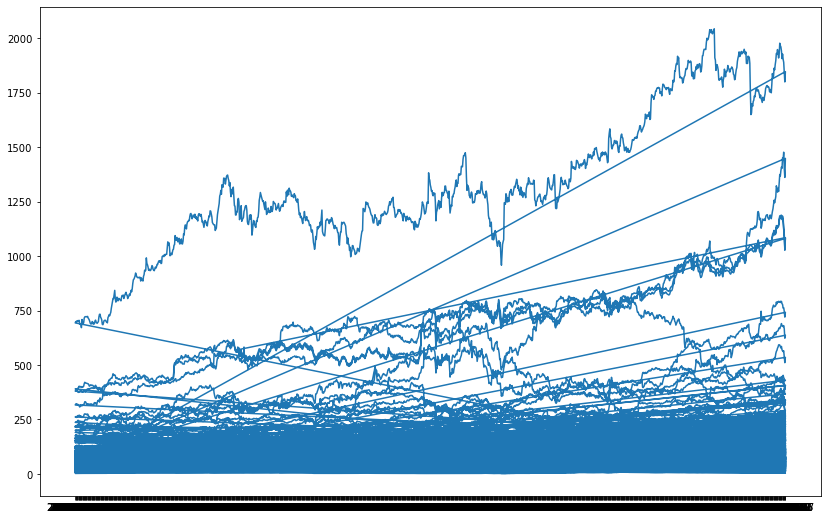

In [19]:
plt.figure(figsize=(14,9))
plt.plot(df['date'],df['open'])

### Analysis of Single STOCK (AAL)

In [35]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [30]:
stockAAL = df[df["Name"]=="AAL"]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

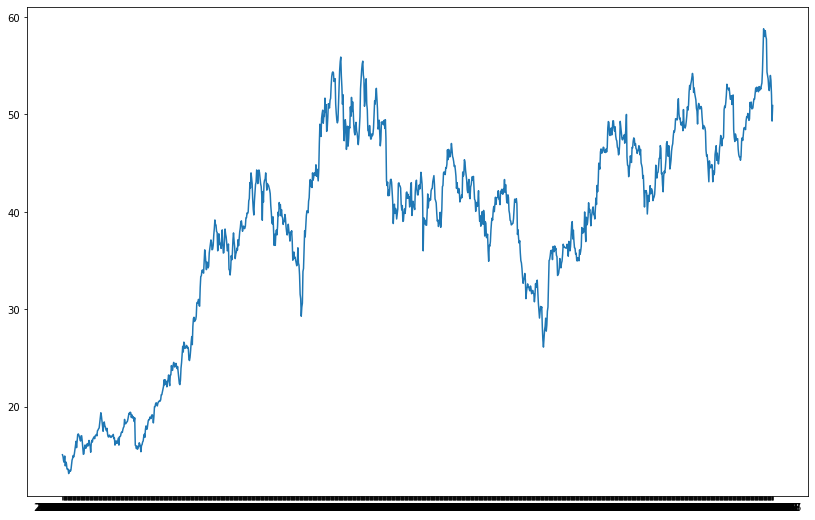

In [33]:
# Trend of Stock AAL:
plt.figure(figsize=(14,9))
plt.plot('date','open',data = stockAAL)

# Monte carlo Simulation.

The following are the steps to apply Monte Carlo Simulation to a financial time series:


1. Data Collection: Collect historical financial data for the asset or portfolio to be analyzed. This data could include daily or monthly closing prices, trading volumes, or any other relevant financial metrics.


2. Calculate Returns: Calculate the periodic returns of the asset or portfolio by dividing the closing price of each period by the closing price of the previous period. This creates a time series of returns, which will be used as the input for the Monte Carlo simulation.


3. Calculate Statistical Properties: Calculate the statistical properties of the returns time series, including the mean, standard deviation, skewness, and kurtosis. These properties are used to generate the random variables for the Monte Carlo simulation.


4. Generate Random Variables: Generate a set of random variables based on the statistical properties of the returns time series. The random variables should be normally distributed with the same mean and standard deviation as the returns time series.


5. Simulate Future Returns: Using the generated random variables, simulate the future returns of the asset or portfolio over a given time horizon. This can be done by multiplying each random variable by the standard deviation of the returns time series and adding it to the previous period's return.


6. Calculate Future Prices: Using the simulated returns, calculate the future prices of the asset or portfolio by multiplying each period's return by the previous period's closing price.


7. Repeat Simulation: Repeat the simulation process multiple times to generate a range of possible future scenarios for the asset or portfolio.


8. Analyze Results: Analyze the range of possible future scenarios to gain insight into the asset or portfolio's potential future performance. This can include calculating the probability of certain outcomes, such as achieving a specific return or losing a certain percentage of value.

In [38]:

# Define required parameters for Simulation
num_simulations = 50
num_days = 126

# Calculate daily returns
returns = df['close'].pct_change()

# Calculate mean and standard deviation of daily returns
mu = returns.mean()
sigma = returns.std()


In [39]:
# Generate random simulations
simulations = np.zeros((num_days, num_simulations))



<IPython.core.display.Javascript object>

In [44]:


# Set up empty array for simulations
simulations = np.zeros((num_days, num_simulations))

# Set initial price
simulations[0, :] = df['close'].iloc[-1]

# Calculate drift and shock
drift = np.full((num_days-1, num_simulations), mu)
shock = sigma * np.random.normal(size=(num_days-1, num_simulations))

# Calculate prices for all days and simulations
simulations[1:, :] = simulations[0, :] * np.cumprod(1 + drift + shock, axis=0)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

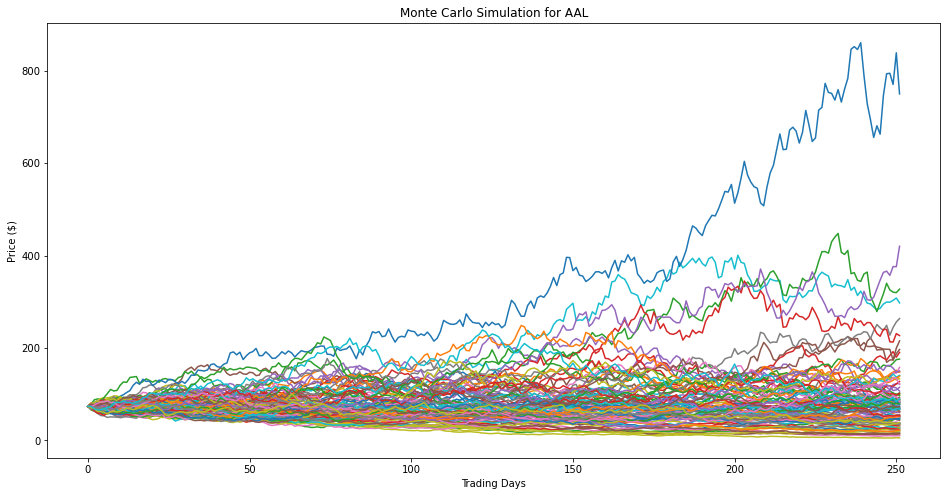

In [48]:
# Plot simulation results
plt.figure(figsize=(16, 8))
plt.title('Monte Carlo Simulation for ' + df['Name'][0])
plt.ylabel('Price ($)')
plt.xlabel('Trading Days')
plt.plot(simulations)




In [46]:
# Calculate expected returns and volatility
expected_returns = np.mean(simulations, axis=1)
volatility = np.std(simulations, axis=1)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

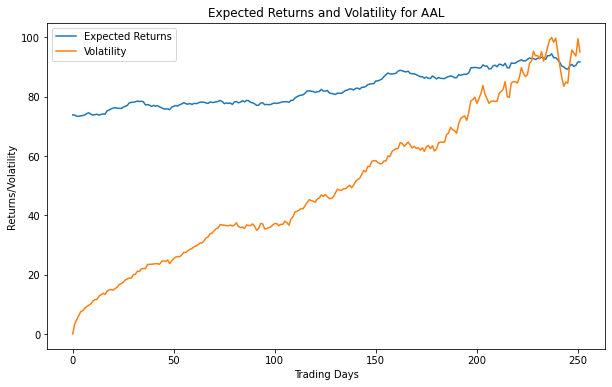

In [47]:
# Plot expected returns and volatility
plt.figure(figsize=(10, 6))
plt.title('Expected Returns and Volatility for ' + df['Name'][0])
plt.ylabel('Returns/Volatility')
plt.xlabel('Trading Days')
plt.plot(expected_returns, label='Expected Returns')
plt.plot(volatility, label='Volatility')
plt.legend()
